https://www.kaggle.com/competitions/digit-recognizer/data
Dtaset used in given notebook

In [ ]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
import seaborn as sns

In [7]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize first 5 images from training set


In [9]:
def show_sample_images(df, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    pixel_cols = [col for col in df.columns if col != 'label']
    for i, ax in enumerate(axes):
        # get one image (first num_images rows)
        image = df.iloc[i][pixel_cols].values.astype(np.float32)
        # Normalize for visualization (if not already 0-255)
        image = image.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        if 'label' in df.columns:
            ax.set_title(f"Label: {df.iloc[i]['label']}")
    plt.show()

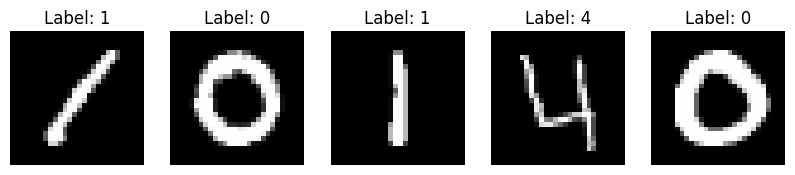

In [10]:
# Visualize first 5 images from training set
show_sample_images(train, num_images=5)

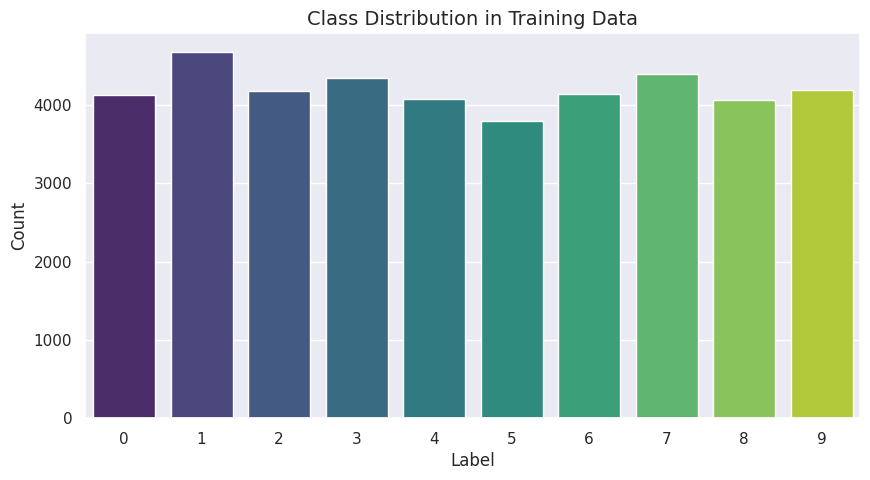

In [11]:
sns.set_theme(style="darkgrid", palette="muted")
plt.figure(figsize=(10, 5))
sns.countplot(x=train["label"], palette="viridis")
plt.title("Class Distribution in Training Data", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


# Preprocessing 

In [12]:
# Separate features and labels
X = train.drop("label", axis=1).values.astype(np.float32)
y = train["label"].values

In [13]:
# Normalize pixel values
X = X / 255.0

In [15]:
X_test = test.values.astype(np.float32) / 255.0

In [16]:
# Reshape to image dimensions.
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [17]:
# Convert labels to one-hot encoding (for multi-class classification)
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Build and Train the Model

In [19]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model


In [21]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=10, batch_size=64)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7293 - loss: 0.8120 - val_accuracy: 0.9679 - val_loss: 0.1040
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9553 - loss: 0.1455 - val_accuracy: 0.9765 - val_loss: 0.0695
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9683 - loss: 0.1084 - val_accuracy: 0.9848 - val_loss: 0.0488
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9751 - loss: 0.0846 - val_accuracy: 0.9860 - val_loss: 0.0420
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9763 - loss: 0.0797 - val_accuracy: 0.9855 - val_loss: 0.0432
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9802 - loss: 0.0650 - val_accuracy: 0.9863 - val_loss: 0.0388
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9818 - loss: 0.0585 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0

In [22]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

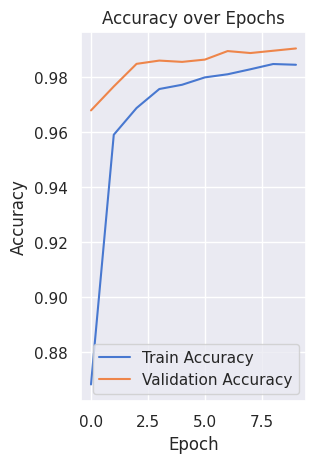

In [23]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

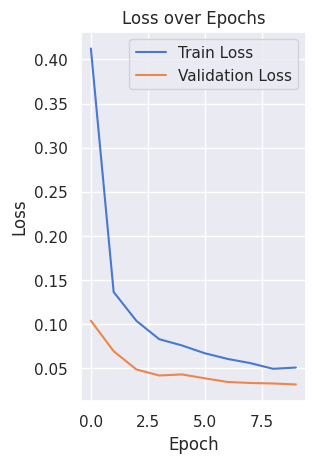

In [24]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


# Prediction

In [25]:
# Predict probabilities and then choose the class with highest probability.
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [26]:
# --- Save the Output to an Excel File ---
# Create a DataFrame with 'ImageId' and 'Prediction'
submission_df = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions) + 1),
    "Prediction": predictions
})

In [27]:
# Save to Excel file (requires openpyxl or xlsxwriter)
submission_df.to_csv("submissionp.csv", index=False)
print("Submission saved to submission.csv")

Submission saved to submission.csv
